In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('/Users/swarnim/Desktop/Salary.csv')

In [3]:
df.head(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
5,Infosys,Data Scientist,30.0,Bangalore,"₹9,08,764/yr"
6,Capgemini,Data Scientist,28.0,Bangalore,"₹9,26,124/yr"
7,Cognizant Technology Solutions,Data Scientist,26.0,Bangalore,"₹7,36,708/yr"
8,Anheuser-Busch InBev,Data Scientist,25.0,Bangalore,"₹16,46,721/yr"
9,Fractal,Data Scientist,22.0,Bangalore,"₹13,92,960/yr"


In [4]:
df.isnull().sum()

Company Name           3
Job Title              0
Salaries Reported      2
Location               0
Salary               112
dtype: int64

In [5]:
df = df.dropna(subset=['Company Name'])

df = df.reset_index(drop=True)

In [6]:
df.isnull().sum()

Company Name           0
Job Title              0
Salaries Reported      2
Location               0
Salary               112
dtype: int64

In [7]:
com_rows = df[df['Company Name'].str.contains('Mu Sigma', na=False)]

In [8]:
com_rows

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
961,Mu Sigma,Data Scientist,1.0,Bangalore,"₹7,22,247/yr"
1466,Mu Sigma,Data Scientist,1.0,Hyderabad,"₹33,879/mo"
1716,Mu Sigma,Data Scientist,1.0,New Delhi,"₹5,59,071/yr"
1862,Mu Sigma,Data Scientist,1.0,Mumbai,"₹24,98,867/yr"
1956,Mu Sigma,Data Analyst,45.0,Bangalore,"₹6,10,598/yr"
2980,Mu Sigma,Data Engineer,5.0,Bangalore,"₹7,86,846/yr"
3352,Mu Sigma,Data Engineer,1.0,Hyderabad,"₹10,04,884/yr"
4259,Mu Sigma,Machine Learning Engineer,1.0,Mumbai,"₹6,71,696/yr"


In [9]:
#Dropping Column of Salary Reported as it doesn't seem to provide any insight
df.drop('Salaries Reported', axis=1, inplace=True)

In [10]:
df

,Company Name,Job Title,Location,Salary
0,Mu Sigma,Data Scientist,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,Bangalore,"₹9,44,110/yr"
...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,"₹5,180/mo"
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,"₹7,51,286/yr"
4338,MyWays,Machine Learning Developer,Mumbai,"₹4,10,952/yr"
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,"₹16,12,324/yr"


In [11]:
#Remove the comma from the salary column
df['Salary'] = df['Salary'].str.replace(',', '')

In [12]:
df


,Company Name,Job Title,Location,Salary
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr
1,IBM,Data Scientist,Bangalore,₹1191950/yr
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr
4,Accenture,Data Scientist,Bangalore,₹944110/yr
...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr
4338,MyWays,Machine Learning Developer,Mumbai,₹410952/yr
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr


In [13]:
# Extract the currency symbol from the salary column
df['Currency'] = df['Salary'].str.extract(r'([₹$€])')

In [14]:
df

,Company Name,Job Title,Location,Salary,Currency
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr,₹
1,IBM,Data Scientist,Bangalore,₹1191950/yr,₹
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr,₹
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr,₹
4,Accenture,Data Scientist,Bangalore,₹944110/yr,₹
...,...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo,₹
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr,₹
4338,MyWays,Machine Learning Developer,Mumbai,₹410952/yr,₹
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr,₹


In [15]:
# Extract the salary period from the salary column
df['Salary Period'] = df['Salary'].str.extract(r'(/yr|/mo)')

In [16]:
df

,Company Name,Job Title,Location,Salary,Currency,Salary Period
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr,₹,/yr
1,IBM,Data Scientist,Bangalore,₹1191950/yr,₹,/yr
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr,₹,/yr
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr,₹,/yr
4,Accenture,Data Scientist,Bangalore,₹944110/yr,₹,/yr
...,...,...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo,₹,/mo
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr,₹,/yr
4338,MyWays,Machine Learning Developer,Mumbai,₹410952/yr,₹,/yr
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr,₹,/yr


In [17]:
# Extract the numeric value from the salary column
df['Numeric Value of Salary'] = df['Salary'].str.extract(r'(\d+)').fillna(0).astype(int)

In [18]:
df

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr,₹,/yr,648573
1,IBM,Data Scientist,Bangalore,₹1191950/yr,₹,/yr,1191950
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr,₹,/yr,836874
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr,₹,/yr,669578
4,Accenture,Data Scientist,Bangalore,₹944110/yr,₹,/yr,944110
...,...,...,...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo,₹,/mo,5180
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr,₹,/yr,751286
4338,MyWays,Machine Learning Developer,Mumbai,₹410952/yr,₹,/yr,410952
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr,₹,/yr,1612324


In [19]:

df.isnull().sum()


Company Name                 0
Job Title                    0
Location                     0
Salary                     112
Currency                   119
Salary Period              112
Numeric Value of Salary      0
dtype: int64

In [20]:
#Splitting the testing dataset with actual null values
testing_data = df[df.isnull().any(axis=1)]



In [21]:
df = df.dropna()

In [22]:
df

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr,₹,/yr,648573
1,IBM,Data Scientist,Bangalore,₹1191950/yr,₹,/yr,1191950
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr,₹,/yr,836874
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr,₹,/yr,669578
4,Accenture,Data Scientist,Bangalore,₹944110/yr,₹,/yr,944110
...,...,...,...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo,₹,/mo,5180
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr,₹,/yr,751286
4338,MyWays,Machine Learning Developer,Mumbai,₹410952/yr,₹,/yr,410952
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr,₹,/yr,1612324


In [23]:
testing_data

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
94,Knowledge Lens,Data Scientist,Bangalore,NaN,NaN,NaN,0
95,IBM,Data Scientist,Bangalore,NaN,NaN,NaN,0
104,Bristlecone,Data Scientist,Bangalore,NaN,NaN,NaN,0
141,Bepec Solutions,Data Scientist,Bangalore,NaN,NaN,NaN,0
143,Exposys Data Labs,Data Scientist,Bangalore,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
3669,Larvol Group,Data Engineer,Mumbai,NaN,NaN,NaN,0
3712,ICICI Bank,Data Engineer,Mumbai,NaN,NaN,NaN,0
3833,BRIDGEi2i,Machine Learning Engineer,Bangalore,NaN,NaN,NaN,0
3874,Turing.com,Machine Learning Engineer,Bangalore,NaN,NaN,NaN,0


In [24]:
#Filtering the rows where Salary Period is '/mo' to convert them into /yr
monthly_salaries = df[df['Salary Period'].str.contains('/mo')]

In [25]:
monthly_salaries

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
36,First Student,Data Scientist,Bangalore,₹41271/mo,₹,/mo,41271
66,FlyNava Technologies,Data Scientist,Bangalore,₹49928/mo,₹,/mo,49928
120,Tech Data,Data Scientist,Bangalore,₹100000/mo,₹,/mo,100000
131,Innodatatics,Data Scientist,Bangalore,₹10705/mo,₹,/mo,10705
185,Zycus,Data Scientist,Bangalore,₹75372/mo,₹,/mo,75372
...,...,...,...,...,...,...,...
4331,iPing Data Labs,Machine Learning Engineer,Mumbai,₹10491/mo,₹,/mo,10491
4332,Tekolutions.AI,Machine Learning Engineer,Mumbai,₹8039/mo,₹,/mo,8039
4333,Zipgigz,Machine Learning Engineer,Mumbai,₹8145/mo,₹,/mo,8145
4335,Myraa Technologies,Machine Learning Scientist,Mumbai,₹23173/mo,₹,/mo,23173


In [26]:

monthly_salaries['Numeric Value of Salary'] = monthly_salaries['Numeric Value of Salary'] * 12

/var/folders/n4/p_fj_ynn6h10bx3rj6h9b57r0000gn/T/ipykernel_95439/193250259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_salaries['Numeric Value of Salary'] = monthly_salaries['Numeric Value of Salary'] * 12


In [27]:
monthly_salaries

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
36,First Student,Data Scientist,Bangalore,₹41271/mo,₹,/mo,495252
66,FlyNava Technologies,Data Scientist,Bangalore,₹49928/mo,₹,/mo,599136
120,Tech Data,Data Scientist,Bangalore,₹100000/mo,₹,/mo,1200000
131,Innodatatics,Data Scientist,Bangalore,₹10705/mo,₹,/mo,128460
185,Zycus,Data Scientist,Bangalore,₹75372/mo,₹,/mo,904464
...,...,...,...,...,...,...,...
4331,iPing Data Labs,Machine Learning Engineer,Mumbai,₹10491/mo,₹,/mo,125892
4332,Tekolutions.AI,Machine Learning Engineer,Mumbai,₹8039/mo,₹,/mo,96468
4333,Zipgigz,Machine Learning Engineer,Mumbai,₹8145/mo,₹,/mo,97740
4335,Myraa Technologies,Machine Learning Scientist,Mumbai,₹23173/mo,₹,/mo,278076


In [28]:

numeric_values = monthly_salaries['Numeric Value of Salary']

df.loc[df['Salary Period'].str.contains('/mo'), 'Numeric Value of Salary'] = numeric_values

In [29]:
df

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr,₹,/yr,648573
1,IBM,Data Scientist,Bangalore,₹1191950/yr,₹,/yr,1191950
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr,₹,/yr,836874
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr,₹,/yr,669578
4,Accenture,Data Scientist,Bangalore,₹944110/yr,₹,/yr,944110
...,...,...,...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo,₹,/mo,62160
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr,₹,/yr,751286
4338,MyWays,Machine Learning Developer,Mumbai,₹410952/yr,₹,/yr,410952
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr,₹,/yr,1612324


In [30]:
#Replacing /mo with /yr
df['Salary Period'] = df['Salary Period'].str.replace('/mo', '/yr')

/var/folders/n4/p_fj_ynn6h10bx3rj6h9b57r0000gn/T/ipykernel_95439/1864137031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Period'] = df['Salary Period'].str.replace('/mo', '/yr')


In [31]:
df

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr,₹,/yr,648573
1,IBM,Data Scientist,Bangalore,₹1191950/yr,₹,/yr,1191950
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr,₹,/yr,836874
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr,₹,/yr,669578
4,Accenture,Data Scientist,Bangalore,₹944110/yr,₹,/yr,944110
...,...,...,...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo,₹,/yr,62160
4337,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr,₹,/yr,751286
4338,MyWays,Machine Learning Developer,Mumbai,₹410952/yr,₹,/yr,410952
4339,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr,₹,/yr,1612324


In [32]:
#Changing currency
currency_filter = df['Currency'].isin(['$', '€'])
currency_rows = df[currency_filter]

In [33]:
currency_rows

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
415,ICICI Bank,Data Scientist,Bangalore,$224948/yr,$,/yr,224948
658,Infosys,Data Scientist,Bangalore,$511613/yr,$,/yr,511613
1096,Schlumberger,Data Scientist,Pune,$53527/yr,$,/yr,53527
1846,IBM,Data Scientist,Mumbai,$205476/yr,$,/yr,205476
1857,ABC,Data Scientist,Mumbai,$96739/yr,$,/yr,96739
1859,Google,Data Scientist,Mumbai,$124434/yr,$,/yr,124434
1869,Bharti Airtel,Data Scientist,Mumbai,$604401/yr,$,/yr,604401
2282,EBC,Data Analyst,Pune,$84698/yr,$,/yr,84698
2485,Genpact,Data Analyst,Hyderabad,$513690/yr,$,/yr,513690
3417,Cognizant Technology Solutions,Data Engineer,Hyderabad,$820000/yr,$,/yr,820000


In [34]:

df.loc[df['Currency'].isin(['$', '€']), 'Numeric Value of Salary'] = df.loc[df['Currency'].isin(['$', '€']), 'Numeric Value of Salary'] * 82 #1 USD taken to be 82 INR

df.update(currency_rows)

df.reset_index(drop=True, inplace=True)

In [35]:
df

,Company Name,Job Title,Location,Salary,Currency,Salary Period,Numeric Value of Salary
0,Mu Sigma,Data Scientist,Bangalore,₹648573/yr,₹,/yr,648573
1,IBM,Data Scientist,Bangalore,₹1191950/yr,₹,/yr,1191950
2,Tata Consultancy Services,Data Scientist,Bangalore,₹836874/yr,₹,/yr,836874
3,Impact Analytics,Data Scientist,Bangalore,₹669578/yr,₹,/yr,669578
4,Accenture,Data Scientist,Bangalore,₹944110/yr,₹,/yr,944110
...,...,...,...,...,...,...,...
4217,TaiyōAI,Machine Learning Scientist,Mumbai,₹5180/mo,₹,/yr,62160
4218,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹751286/yr,₹,/yr,751286
4219,MyWays,Machine Learning Developer,Mumbai,₹410952/yr,₹,/yr,410952
4220,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹1612324/yr,₹,/yr,1612324


In [36]:
df['Currency'] = df['Currency'].replace('$', '₹')

/var/folders/n4/p_fj_ynn6h10bx3rj6h9b57r0000gn/T/ipykernel_95439/3850670077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Currency'] = df['Currency'].replace('$', '₹')


In [37]:
df['Salary Cleaned'] = df['Currency'] + df['Numeric Value of Salary'].astype(str) + df['Salary Period']

/var/folders/n4/p_fj_ynn6h10bx3rj6h9b57r0000gn/T/ipykernel_95439/3810460194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Cleaned'] = df['Currency'] + df['Numeric Value of Salary'].astype(str) + df['Salary Period']


In [38]:
#Keeping only the cleaned salary
df.drop('Salary', axis=1, inplace=True)

/var/folders/n4/p_fj_ynn6h10bx3rj6h9b57r0000gn/T/ipykernel_95439/238893386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Salary', axis=1, inplace=True)


In [39]:
df

,Company Name,Job Title,Location,Currency,Salary Period,Numeric Value of Salary,Salary Cleaned
0,Mu Sigma,Data Scientist,Bangalore,₹,/yr,648573,₹648573/yr
1,IBM,Data Scientist,Bangalore,₹,/yr,1191950,₹1191950/yr
2,Tata Consultancy Services,Data Scientist,Bangalore,₹,/yr,836874,₹836874/yr
3,Impact Analytics,Data Scientist,Bangalore,₹,/yr,669578,₹669578/yr
4,Accenture,Data Scientist,Bangalore,₹,/yr,944110,₹944110/yr
...,...,...,...,...,...,...,...
4217,TaiyōAI,Machine Learning Scientist,Mumbai,₹,/yr,62160,₹62160/yr
4218,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹,/yr,751286,₹751286/yr
4219,MyWays,Machine Learning Developer,Mumbai,₹,/yr,410952,₹410952/yr
4220,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹,/yr,1612324,₹1612324/yr


In [40]:
#Data Visualization
city_counts = df['Location'].value_counts()


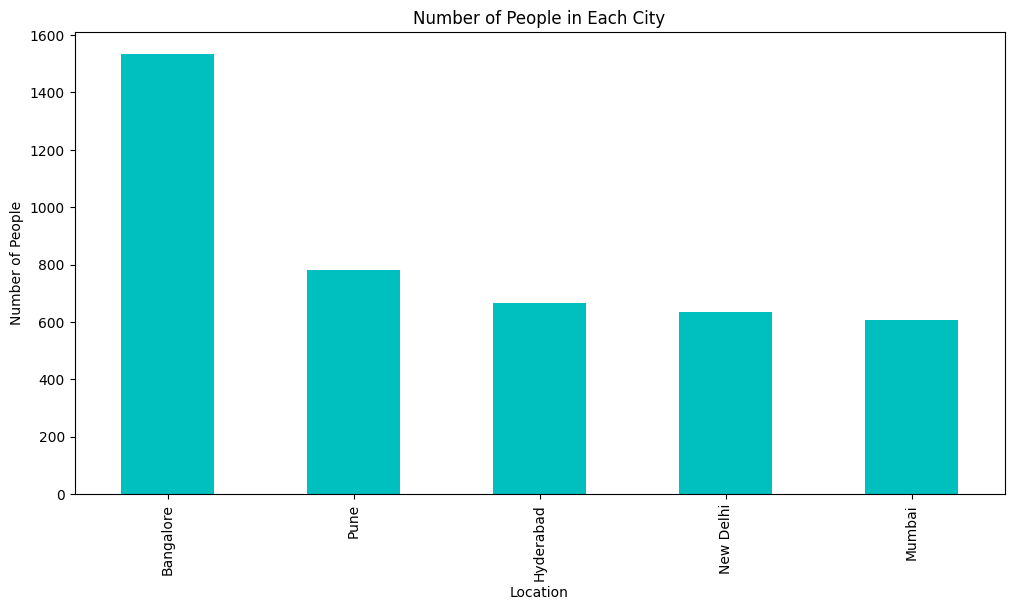

In [41]:

plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='c', width=0.5)
plt.ylabel('Number of People')
plt.title('Number of People in Each City')
plt.xticks(rotation=90)
plt.show()


In [42]:
#Bangalore has more people so maybe average will be more of Bangalore. This shows dependency of salary on location.
city_counts

Location
Bangalore    1534
Pune          780
Hyderabad     666
New Delhi     636
Mumbai        606
Name: count, dtype: int64

In [43]:
# Group by 'Company Name', 'Job Title', and 'Location' and calculate average salary
avg_salary_df = df.groupby(['Company Name', 'Job Title', 'Location'])['Numeric Value of Salary'].mean().reset_index()

df = pd.merge(df, avg_salary_df, on=['Company Name', 'Job Title', 'Location'], how='left', suffixes=('', '_avg'))

df.rename(columns={'Salary_avg': 'Average Salary'}, inplace=True)



In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [45]:
df

,Company Name,Job Title,Location,Currency,Salary Period,Numeric Value of Salary,Salary Cleaned,Numeric Value of Salary_avg
0,Mu Sigma,Data Scientist,Bangalore,₹,/yr,648573,₹648573/yr,685410.00
1,IBM,Data Scientist,Bangalore,₹,/yr,1191950,₹1191950/yr,966103.67
2,Tata Consultancy Services,Data Scientist,Bangalore,₹,/yr,836874,₹836874/yr,879798.00
3,Impact Analytics,Data Scientist,Bangalore,₹,/yr,669578,₹669578/yr,609230.33
4,Accenture,Data Scientist,Bangalore,₹,/yr,944110,₹944110/yr,829691.00
...,...,...,...,...,...,...,...,...
4217,TaiyōAI,Machine Learning Scientist,Mumbai,₹,/yr,62160,₹62160/yr,62160.00
4218,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹,/yr,751286,₹751286/yr,751286.00
4219,MyWays,Machine Learning Developer,Mumbai,₹,/yr,410952,₹410952/yr,410952.00
4220,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹,/yr,1612324,₹1612324/yr,1612324.00


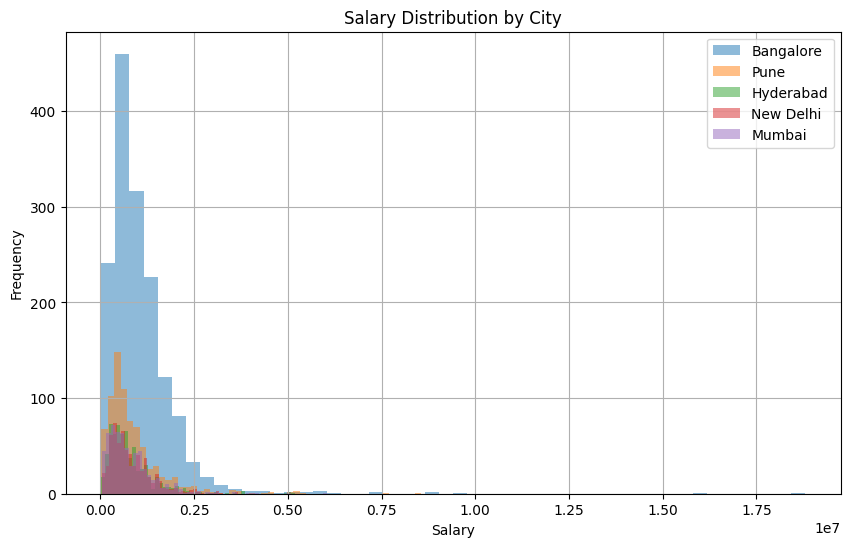

In [46]:
plt.figure(figsize=(10, 6))
for city in df['Location'].unique():
    city_data = df[df['Location'] == city]['Numeric Value of Salary']
    plt.hist(city_data, bins=50, alpha=0.5, label=city)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution by City')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
#Calculating people in each job
job_title_counts = df['Job Title'].value_counts()



In [48]:
job_title_counts

Job Title
Data Scientist                          1755
Data Analyst                             984
Data Engineer                            799
Machine Learning Engineer                565
Senior Data Scientist                     39
Data Science                              28
Junior Data Scientist                     17
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Software Engineer - Machine Learning       2
Machine Learning Scientist                 2
Machine Learning Data Associate II         2
Machine Learning Consultant                2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Data Science Lead                          1
Associate Machine Learning Engineer        1
Machine Learning Data Analyst              1
Data Science Manager                       1


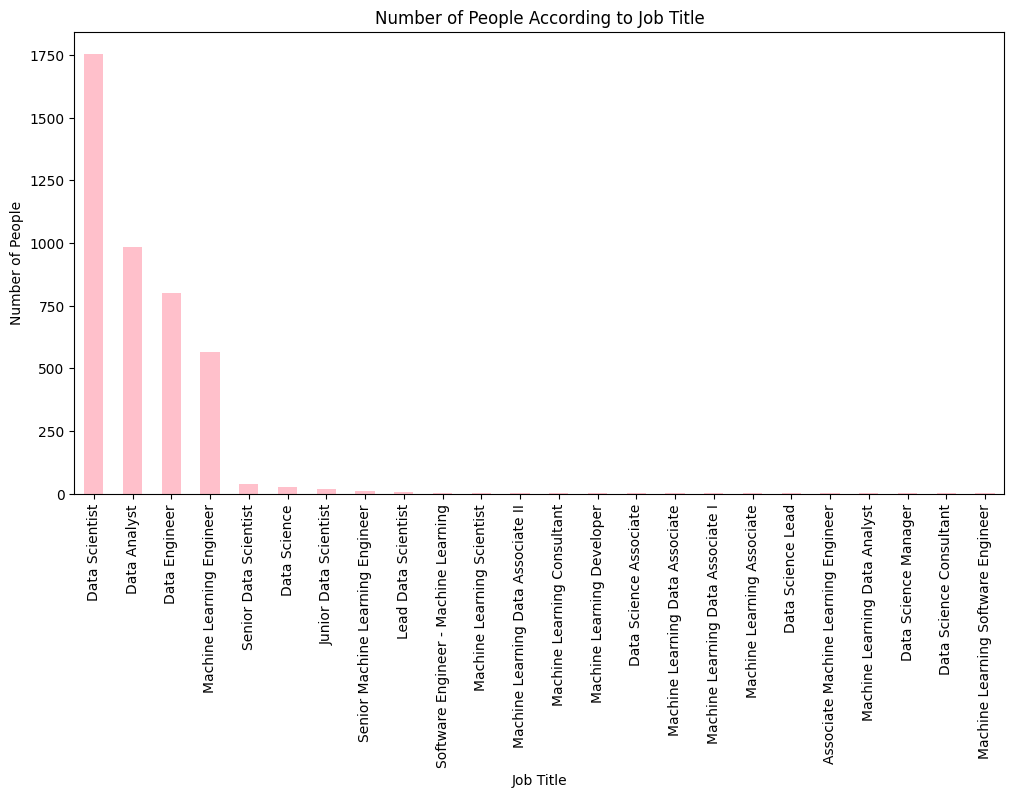

In [49]:

plt.figure(figsize=(12, 6))
job_title_counts.plot(kind='bar', color='pink', width=0.5)
plt.ylabel('Number of People')
plt.title('Number of People According to Job Title')
plt.xticks(rotation=90)
plt.show()

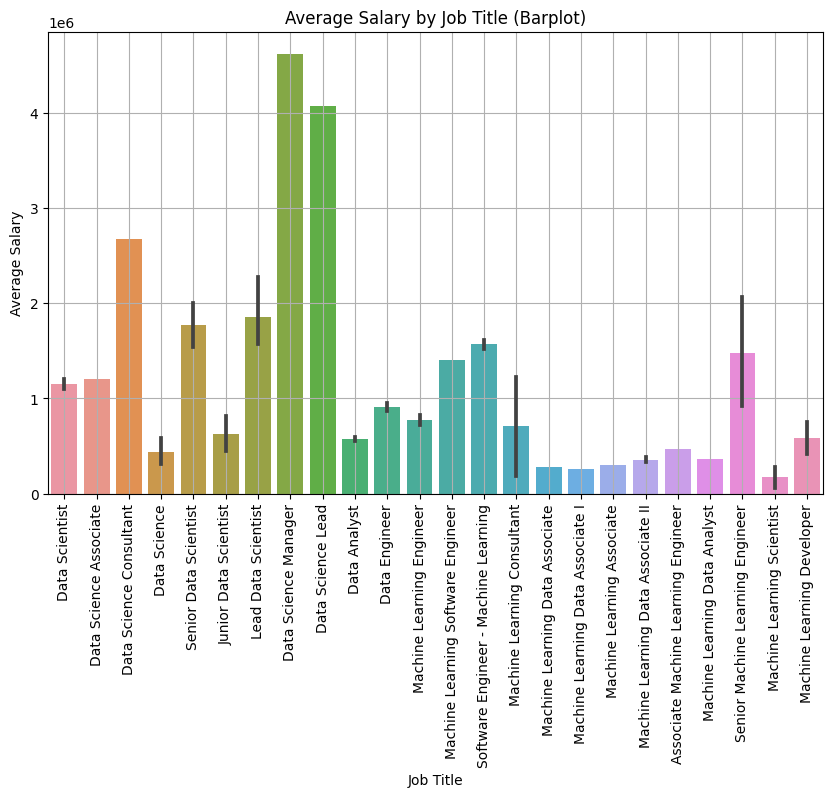

In [50]:
#Seeing average salary of every job title. This shows dependency of salary on job title.
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Title', y='Numeric Value of Salary', data=df, estimator=np.mean)  
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Title (Barplot)')
plt.grid(True)
plt.show()

In [51]:
#Encoding Location by Count Encoding
location_frequency = df['Location'].value_counts()

df['Location_encoded'] = df['Location'].map(location_frequency)

df

,Company Name,Job Title,Location,Currency,Salary Period,Numeric Value of Salary,Salary Cleaned,Numeric Value of Salary_avg,Location_encoded
0,Mu Sigma,Data Scientist,Bangalore,₹,/yr,648573,₹648573/yr,685410.00,1534
1,IBM,Data Scientist,Bangalore,₹,/yr,1191950,₹1191950/yr,966103.67,1534
2,Tata Consultancy Services,Data Scientist,Bangalore,₹,/yr,836874,₹836874/yr,879798.00,1534
3,Impact Analytics,Data Scientist,Bangalore,₹,/yr,669578,₹669578/yr,609230.33,1534
4,Accenture,Data Scientist,Bangalore,₹,/yr,944110,₹944110/yr,829691.00,1534
...,...,...,...,...,...,...,...,...,...
4217,TaiyōAI,Machine Learning Scientist,Mumbai,₹,/yr,62160,₹62160/yr,62160.00,606
4218,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹,/yr,751286,₹751286/yr,751286.00,606
4219,MyWays,Machine Learning Developer,Mumbai,₹,/yr,410952,₹410952/yr,410952.00,606
4220,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹,/yr,1612324,₹1612324/yr,1612324.00,606


In [52]:
#Encoding Job Title by Target Encoding
job_title_mean_salary = df.groupby('Job Title')['Numeric Value of Salary'].mean()

df['Job_Title_encoded'] = df['Job Title'].map(job_title_mean_salary)


In [53]:
df

,Company Name,Job Title,Location,Currency,Salary Period,Numeric Value of Salary,Salary Cleaned,Numeric Value of Salary_avg,Location_encoded,Job_Title_encoded
0,Mu Sigma,Data Scientist,Bangalore,₹,/yr,648573,₹648573/yr,685410.00,1534,1149903.31
1,IBM,Data Scientist,Bangalore,₹,/yr,1191950,₹1191950/yr,966103.67,1534,1149903.31
2,Tata Consultancy Services,Data Scientist,Bangalore,₹,/yr,836874,₹836874/yr,879798.00,1534,1149903.31
3,Impact Analytics,Data Scientist,Bangalore,₹,/yr,669578,₹669578/yr,609230.33,1534,1149903.31
4,Accenture,Data Scientist,Bangalore,₹,/yr,944110,₹944110/yr,829691.00,1534,1149903.31
...,...,...,...,...,...,...,...,...,...,...
4217,TaiyōAI,Machine Learning Scientist,Mumbai,₹,/yr,62160,₹62160/yr,62160.00,606,170118.00
4218,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹,/yr,751286,₹751286/yr,751286.00,606,581119.00
4219,MyWays,Machine Learning Developer,Mumbai,₹,/yr,410952,₹410952/yr,410952.00,606,581119.00
4220,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹,/yr,1612324,₹1612324/yr,1612324.00,606,1566780.00


In [54]:
#Trying to drive more insights from Company Name
num_unique_companies = df['Company Name'].nunique()


In [55]:
num_unique_companies

2491

In [56]:
#Seeing if company offers more or less than average salaries
overall_avg_salary = df['Numeric Value of Salary'].mean()


company_avg_salary = df.groupby('Company Name')['Numeric Value of Salary'].mean()
above_avg_salary = company_avg_salary > overall_avg_salary
binary_feature = above_avg_salary.astype(int)



In [57]:
df['Above_Avg_Salary'] = df['Company Name'].map(binary_feature)

In [58]:
df

,Company Name,Job Title,Location,Currency,Salary Period,Numeric Value of Salary,Salary Cleaned,Numeric Value of Salary_avg,Location_encoded,Job_Title_encoded,Above_Avg_Salary
0,Mu Sigma,Data Scientist,Bangalore,₹,/yr,648573,₹648573/yr,685410.00,1534,1149903.31,0
1,IBM,Data Scientist,Bangalore,₹,/yr,1191950,₹1191950/yr,966103.67,1534,1149903.31,0
2,Tata Consultancy Services,Data Scientist,Bangalore,₹,/yr,836874,₹836874/yr,879798.00,1534,1149903.31,0
3,Impact Analytics,Data Scientist,Bangalore,₹,/yr,669578,₹669578/yr,609230.33,1534,1149903.31,0
4,Accenture,Data Scientist,Bangalore,₹,/yr,944110,₹944110/yr,829691.00,1534,1149903.31,0
...,...,...,...,...,...,...,...,...,...,...,...
4217,TaiyōAI,Machine Learning Scientist,Mumbai,₹,/yr,62160,₹62160/yr,62160.00,606,170118.00,0
4218,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹,/yr,751286,₹751286/yr,751286.00,606,581119.00,0
4219,MyWays,Machine Learning Developer,Mumbai,₹,/yr,410952,₹410952/yr,410952.00,606,581119.00,0
4220,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹,/yr,1612324,₹1612324/yr,1612324.00,606,1566780.00,1


In [59]:
count_above_avg = df['Above_Avg_Salary'].value_counts()

In [60]:
count_above_avg

Above_Avg_Salary
0    2580
1    1642
Name: count, dtype: int64

In [61]:
#Checking for skewness as it may hinder model's performance
skewness = df['Numeric Value of Salary'].skew()

In [62]:
skewness

5.897798791106669

<Axes: xlabel='Numeric Value of Salary', ylabel='Count'>

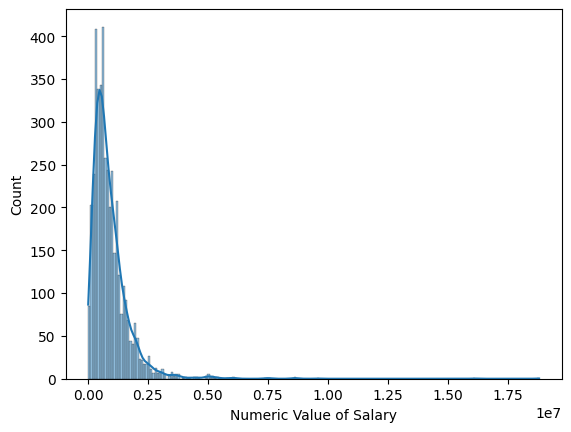

In [63]:
#Positively or right skewed data
sns.histplot(df['Numeric Value of Salary'], kde=True)

In [64]:
#Doing log as it is right skewed and log compresses the value so less risk of extreme values
df['Numeric Value of Salary'] = np.log1p(df['Numeric Value of Salary'])

In [65]:
skewness = df['Numeric Value of Salary'].skew()

In [66]:
#Comes out be 0 which means it is not skewed anymore
skewness

-0.3969702281649708

<Axes: xlabel='Numeric Value of Salary', ylabel='Count'>

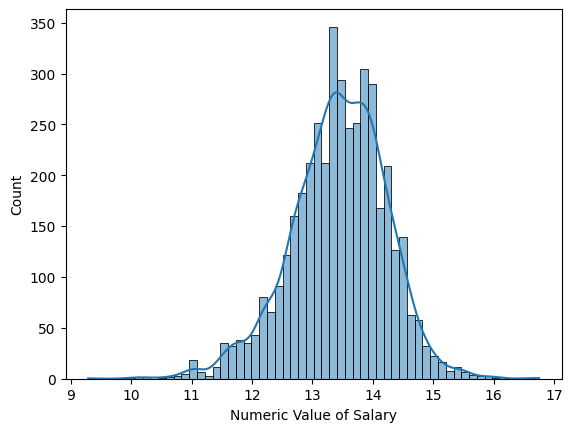

In [67]:
#More normally distributed
sns.histplot(df['Numeric Value of Salary'], kde=True)

In [68]:
df

,Company Name,Job Title,Location,Currency,Salary Period,Numeric Value of Salary,Salary Cleaned,Numeric Value of Salary_avg,Location_encoded,Job_Title_encoded,Above_Avg_Salary
0,Mu Sigma,Data Scientist,Bangalore,₹,/yr,13.38,₹648573/yr,685410.00,1534,1149903.31,0
1,IBM,Data Scientist,Bangalore,₹,/yr,13.99,₹1191950/yr,966103.67,1534,1149903.31,0
2,Tata Consultancy Services,Data Scientist,Bangalore,₹,/yr,13.64,₹836874/yr,879798.00,1534,1149903.31,0
3,Impact Analytics,Data Scientist,Bangalore,₹,/yr,13.41,₹669578/yr,609230.33,1534,1149903.31,0
4,Accenture,Data Scientist,Bangalore,₹,/yr,13.76,₹944110/yr,829691.00,1534,1149903.31,0
...,...,...,...,...,...,...,...,...,...,...,...
4217,TaiyōAI,Machine Learning Scientist,Mumbai,₹,/yr,11.04,₹62160/yr,62160.00,606,170118.00,0
4218,Decimal Point Analytics,Machine Learning Developer,Mumbai,₹,/yr,13.53,₹751286/yr,751286.00,606,581119.00,0
4219,MyWays,Machine Learning Developer,Mumbai,₹,/yr,12.93,₹410952/yr,410952.00,606,581119.00,0
4220,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,₹,/yr,14.29,₹1612324/yr,1612324.00,606,1566780.00,1


In [69]:
#incorporating models.

In [70]:
#Lasso and Ridge Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
X = df[['Numeric Value of Salary_avg', 'Location_encoded', 'Job_Title_encoded', 'Above_Avg_Salary']]
y = df['Numeric Value of Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
lasso_model.fit(X_train, y_train)

Lasso()

In [73]:
ridge_model = Ridge(alpha=5.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

Ridge(alpha=5.0)

In [74]:
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)


In [75]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [76]:
mse_lasso

0.26366780314765603

In [77]:
mse_ridge

0.22509555142571888

In [78]:
#Linear Regressio 
from sklearn.linear_model import LinearRegression


In [79]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)

In [80]:
mse_linear

0.22500955582372828

In [81]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [82]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

y_pred_rf = random_forest_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)

In [83]:
mse_rf

0.09190356973468455

In [84]:
#r2 score
from sklearn.metrics import  r2_score


In [85]:

r2_rf_test = r2_score(y_test, y_pred_rf)

In [86]:
r2_rf_test

0.8559059471103444

In [87]:
r2_linear_test = r2_score(y_test, y_pred_linear)

In [88]:
r2_linear_test

0.6472113223551328

In [89]:
r2_lasso_test = r2_score(y_test, y_pred_lasso)

In [90]:
r2_lasso_test

0.5865997100902705

In [91]:
r2_ridge_test = r2_score(y_test, y_pred_ridge)

In [92]:
r2_ridge_test

0.6470764913049647

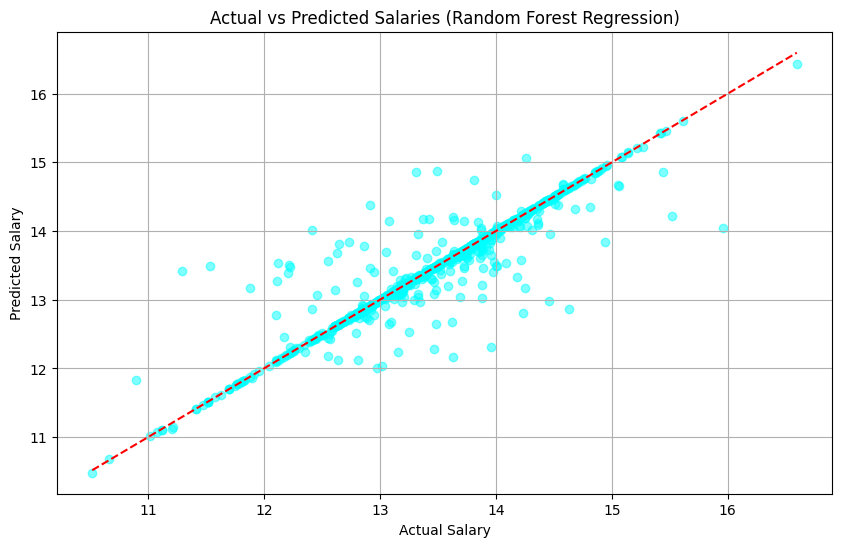

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='cyan', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('Actual vs Predicted Salaries (Random Forest Regression)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()

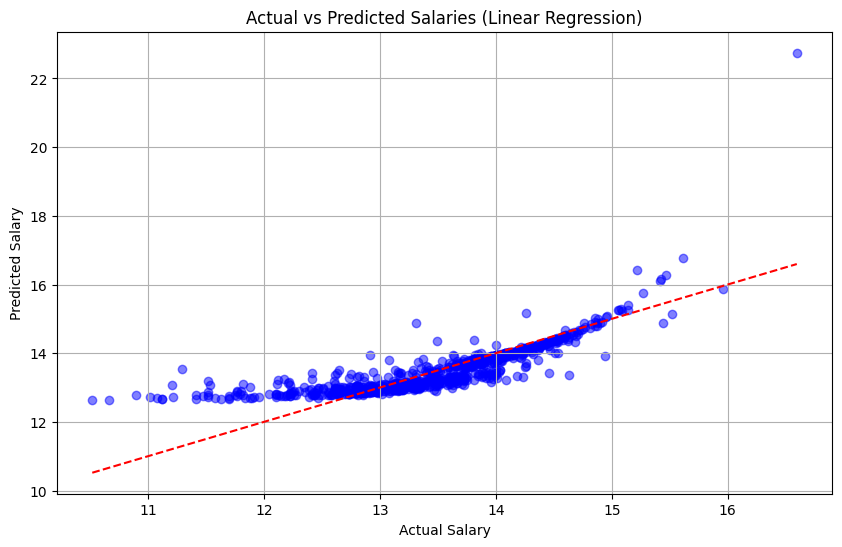

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('Actual vs Predicted Salaries (Linear Regression)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()

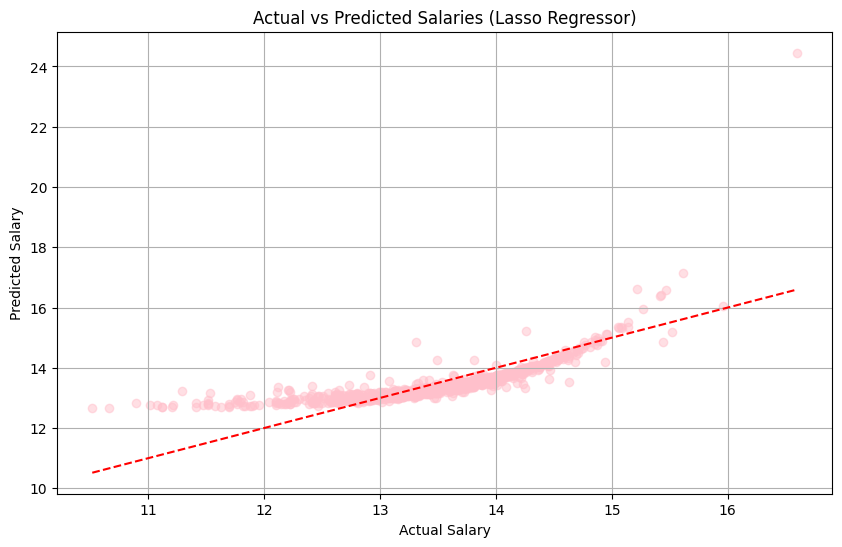

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='pink', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('Actual vs Predicted Salaries (Lasso Regressor)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()

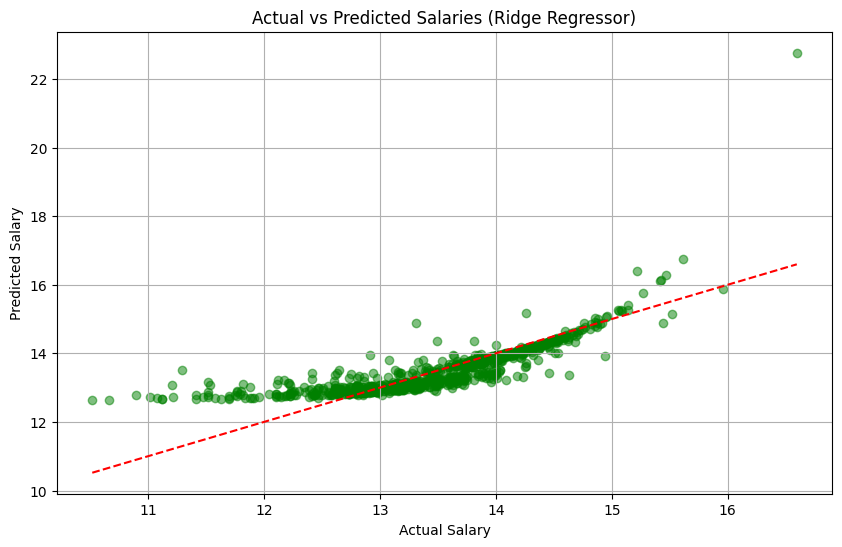

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('Actual vs Predicted Salaries (Ridge Regressor)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()